In [1]:
VERSION = 20
CLOUD_SINGLE = True
DATA_SMALL = False

In [7]:
%run ./Code.ipynb

In [4]:
if 'train_md' not in globals() or 'test_md' not in globals():
    train_md, test_md = loadMetadata()

# OOF

In [17]:
stg = time.time()
for ds in range(6,10):
    for fold in range(3):
        predictions = oof_one(num_iter=8, bs=32, fold=fold, dataset=ds)
        pickle.dump(predictions, open(PATH_WORK/'oof_d{}_f{}_v{}'.format(ds, fold, VERSION),'wb'))
        print('total time', time.time() - stg)

completed epochs: 10 iters starting now: 8
adding dummy serieses 8
DataSet 6 valid size 6496 fold 0
dataset valid: 6496 loader valid: 203
loading model model.b10.f0.d6.v20
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.162 time per batch: 0.183
Batch 100 device: cuda time passed: 16.978 time per batch: 0.170
Batch 150 device: cuda time passed: 24.873 time per batch: 0.166
Batch 200 device: cuda time passed: 32.300 time per batch: 0.161
ver 20, iter 0, fold 0, val ll: 0.0652, cor: 0.8369, auc: 0.9875
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.334 time per batch: 0.187
Batch 100 device: cuda time passed: 17.476 time per batch: 0.175
Batch 150 device: cuda time passed: 26.070 time per batch: 0.174
Batch 200 device: cuda time passed: 33.429 time per batch: 0.167
ver 20, iter 1, fold 0, val ll: 0.0653, cor: 0.8367, auc: 0.9874
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.420 time per batch: 0.188
Batch 100 device: cuda time passed: 17.54

Batch 200 device: cuda time passed: 32.468 time per batch: 0.162
ver 20, iter 5, fold 2, val ll: 0.0617, cor: 0.8392, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.191 time per batch: 0.184
Batch 100 device: cuda time passed: 17.036 time per batch: 0.170
Batch 150 device: cuda time passed: 24.868 time per batch: 0.166
Batch 200 device: cuda time passed: 32.011 time per batch: 0.160
ver 20, iter 6, fold 2, val ll: 0.0616, cor: 0.8393, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.998 time per batch: 0.180
Batch 100 device: cuda time passed: 17.103 time per batch: 0.171
Batch 150 device: cuda time passed: 24.890 time per batch: 0.166
Batch 200 device: cuda time passed: 32.050 time per batch: 0.160
ver 20, iter 7, fold 2, val ll: 0.0617, cor: 0.8391, auc: 0.9889
total running time 309.2684922218323
total time 940.213463306427
completed epochs: 10 iters starting now: 8
adding dummy serieses 8
DataSet 7 valid size 6496 fold 0
dataset

Batch 50 device: cuda time passed: 10.715 time per batch: 0.214
Batch 100 device: cuda time passed: 20.365 time per batch: 0.204
Batch 150 device: cuda time passed: 28.452 time per batch: 0.190
Batch 200 device: cuda time passed: 36.948 time per batch: 0.185
ver 20, iter 3, fold 2, val ll: 0.0603, cor: 0.8429, auc: 0.9893
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.531 time per batch: 0.211
Batch 100 device: cuda time passed: 19.684 time per batch: 0.197
Batch 150 device: cuda time passed: 28.593 time per batch: 0.191
Batch 200 device: cuda time passed: 37.111 time per batch: 0.186
ver 20, iter 4, fold 2, val ll: 0.0605, cor: 0.8430, auc: 0.9893
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.294 time per batch: 0.206
Batch 100 device: cuda time passed: 19.240 time per batch: 0.192
Batch 150 device: cuda time passed: 27.197 time per batch: 0.181
Batch 200 device: cuda time passed: 34.763 time per batch: 0.174
ver 20, iter 5, fold 2, val ll: 0.0603, c

Batch 200 device: cuda time passed: 32.605 time per batch: 0.163
ver 20, iter 0, fold 2, val ll: 0.0626, cor: 0.8366, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.184 time per batch: 0.184
Batch 100 device: cuda time passed: 16.992 time per batch: 0.170
Batch 150 device: cuda time passed: 24.975 time per batch: 0.167
Batch 200 device: cuda time passed: 32.662 time per batch: 0.163
ver 20, iter 1, fold 2, val ll: 0.0626, cor: 0.8366, auc: 0.9882
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.546 time per batch: 0.191
Batch 100 device: cuda time passed: 17.585 time per batch: 0.176
Batch 150 device: cuda time passed: 25.753 time per batch: 0.172
Batch 200 device: cuda time passed: 33.146 time per batch: 0.166
ver 20, iter 2, fold 2, val ll: 0.0626, cor: 0.8369, auc: 0.9882
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.126 time per batch: 0.183
Batch 100 device: cuda time passed: 17.177 time per batch: 0.172
Batch 150 device: 

ver 20, iter 6, fold 1, val ll: 0.0626, cor: 0.8404, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.644 time per batch: 0.193
Batch 100 device: cuda time passed: 17.776 time per batch: 0.178
Batch 150 device: cuda time passed: 26.066 time per batch: 0.174
Batch 200 device: cuda time passed: 33.986 time per batch: 0.170
ver 20, iter 7, fold 1, val ll: 0.0624, cor: 0.8406, auc: 0.9881
total running time 310.90257143974304
total time 3556.5488913059235
completed epochs: 10 iters starting now: 8
adding dummy serieses 2
DataSet 9 valid size 6496 fold 2
dataset valid: 6496 loader valid: 203
loading model model.b10.f2.d9.v20
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.322 time per batch: 0.186
Batch 100 device: cuda time passed: 17.375 time per batch: 0.174
Batch 150 device: cuda time passed: 25.351 time per batch: 0.169
Batch 200 device: cuda time passed: 32.601 time per batch: 0.163
ver 20, iter 0, fold 2, val ll: 0.0606, cor: 0.8411, auc: 0.98

In [12]:
476*8*4/60/60

4.231111111111111

In [ ]:
# correlation between models
# scores per slice
# what is the best way to agg oof, model\run levels
# best aggregation theoretically
# distribution of oof preds
# score - what uniform p will get
# 0.5 + np.sign(x-0.5) *2*(x-0.5)**2 - makes it less aggressive, is it a good transform above mean?
# does scaling help for single runs, or is it aggregation artifact.

# s101 problem.
    # maybe 8 and 32 behave differently

## Selecting runs aggregation

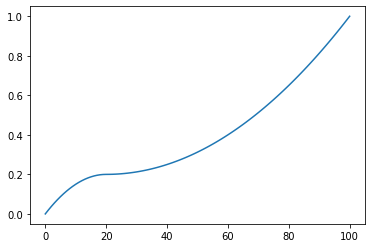

In [38]:
x = np.arange(101)/100
plt.plot(scalePreds(x, center=0.2))

In [11]:
np.set_printoptions(precision=5)

for fold in range(3):
    print('fold', fold)
    data_fold = train_md.loc[train_md.fold == fold]
    ww = data_fold.weights.values
    ww = ww/ww.mean()

    preds = np.stack([pickle.load(open(PATH_WORK/'oof_d{}_f{}_v{}'.format(ds, fold, VERSION),'rb')) \
        for ds in range(6,10)])

    assert len(data_fold) == preds.shape[2]
    
    preds = np.clip(preds, 1e-15, 1-1e-15)
    for afunc in afuncs_names:
        apreds = applyAggFunc(preds, afunc)
        res = ((- data_fold[all_ich].values * np.log(apreds) - (1 - data_fold[all_ich].values) * np.log(1 - apreds))\
            * class_weights).mean((1,2))
        resw = (((- data_fold[all_ich].values * np.log(apreds) - (1 - data_fold[all_ich].values) * np.log(1 - apreds))\
            * class_weights).mean(2)*ww).mean(1)
        
        #roc = [roc_auc_score(data_fold[all_ich].values.reshape(-1), apreds[i].reshape(-1)) for i in range(4)]
        print('{:7s} {} {}'.format(afunc,res,resw))

fold 0
mean    [0.06429 0.06347 0.06388 0.06304] [0.03816 0.03822 0.0384  0.03748]
gmean   [0.06444 0.06361 0.06411 0.06326] [0.03824 0.03834 0.03854 0.03766]
q50     [0.06454 0.06372 0.06428 0.06335] [0.03833 0.03843 0.03866 0.03772]
q25     [0.06518 0.06432 0.06533 0.06426] [0.03866 0.0388  0.03924 0.0383 ]
q75     [0.0646  0.06367 0.06456 0.06314] [0.03832 0.03838 0.03889 0.03755]
psig    [0.06443 0.06362 0.06407 0.06324] [0.03823 0.03836 0.03853 0.03765]
fold 1
mean    [0.06225 0.06248 0.06258 0.06124] [0.03745 0.0385  0.03817 0.03723]
gmean   [0.06232 0.06259 0.06286 0.06144] [0.03755 0.03864 0.0384  0.03744]
q50     [0.06246 0.06274 0.06298 0.06153] [0.03764 0.03872 0.03849 0.03745]
q25     [0.06279 0.06314 0.06421 0.06238] [0.03804 0.03919 0.03941 0.03828]
q75     [0.0627  0.06297 0.06296 0.06155] [0.03752 0.03861 0.03817 0.03711]
psig    [0.06237 0.06263 0.06278 0.06143] [0.03756 0.03865 0.03834 0.03742]
fold 2
mean    [0.06078 0.05956 0.06078 0.05974] [0.03823 0.03747 0.0383  

In [134]:
preds_all = getPredsOOF(aug=8,datasets=range(6,10))

In [135]:
preds_y = getYuvalOOF(train_md=train_md)

In [136]:
preds_y.shape

(1, 32, 674252, 6)

In [137]:
preds_y.mean((0,1,2))

array([0.14454623, 0.00368541, 0.04786682, 0.03557413, 0.0453731 ,
       0.06410452])

In [138]:
preds_y = preds_y[:,:8]

In [139]:
preds_all = np.concatenate([preds_all, preds_y], axis=0)

In [140]:
preds_all.shape

(5, 8, 674252, 6)

In [71]:
np.set_printoptions(precision=5)

ww = train_md.weights.values
ww = ww/ww.mean()

for afunc in afuncs_names:
    apreds = applyAggFunc(preds_all, afunc)
    res = ((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
        * class_weights).mean((1,2))
    resw = (((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
        * class_weights).mean(2)*ww).mean(1)

    print('{:7s} {} {}'.format(afunc,res,resw))

mean    [0.06244 0.06184 0.06241 0.06134 0.06162] [0.03794 0.03806 0.03829 0.03741 0.03805]
gmean   [0.06256 0.06196 0.06263 0.06152 0.0617 ] [0.03804 0.03818 0.03845 0.03756 0.03814]
q50     [0.06268 0.06209 0.06279 0.06161 0.06181] [0.03813 0.03827 0.03857 0.03761 0.03821]
q25     [0.06318 0.06258 0.06378 0.06236 0.06216] [0.03849 0.03865 0.0392  0.03817 0.03853]
q75     [0.06278 0.06217 0.06311 0.06165 0.06186] [0.03807 0.03823 0.03867 0.0375  0.03813]
psig    [0.06257 0.06199 0.06259 0.06151 0.06173] [0.03804 0.03819 0.03843 0.03755 0.03815]


In [18]:
((- train_md[all_ich].values * np.log(preds_all) 
  - (1 - train_md[all_ich].values) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([0.06332, 0.06269, 0.06419, 0.06245])

In [19]:
((- train_md[all_ich].values * np.log(preds_all.mean(1)) 
  - (1 - train_md[all_ich].values) * np.log(np.clip(1 - preds_all.mean(1),1e-15,1-1e-15)))
 * class_weights).mean((1,2))

array([0.06244, 0.06184, 0.06241, 0.06134])

In [20]:
runs_afunc = 'mean'
preds2 = applyAggFunc(preds_all, runs_afunc)

## Bounding

In [123]:
preds_all.shape

(5, 8, 674252, 6)

In [141]:
preds_all = predBounding(preds_all, target=train_md[all_ich].values)

initial score 0.059136846611720396
any too low inconsistencies
1 class: 0.011970301904925755
2 class: 0.03045474837301187
3 class: 0.025180978328577446
4 class: 0.04475941487752354
5 class: 0.10971465416491163
total 0.15272053327242632
any too low corrected score 0.059130512695806006
any too high inconsistencies
total 0.15224267039623168
any too high corrected score 0.059119088276254124


In [133]:
def predBounding(pp, target=None):
    if target is not None:
        ll = ((- target * np.log(pp.mean((0,1))) - (1 - target) * np.log(np.clip(1 - pp.mean((0,1)),1e-15,1-1e-15)))
            * class_weights).mean()
        print('initial score', ll)
    
    print('any too low inconsistencies')
    for i in range(1,6):
        print(i, 'class:', (pp[...,0] < pp[...,i]).mean())
    print('total', (pp[...,0] < pp[...,1:].max(-1)).mean())
    
    max_vals = pp[...,1:].max(-1)
    mask = pp[...,0] < max_vals
    pp[mask,0] = max_vals[mask]
    #mask_vals = 0.5*(preds_all[:,:,:,0] + max_vals)[mask]
    #preds_all[mask,0] = mask_vals
    #preds_all[mask] = np.clip(preds_all[mask],0,np.expand_dims(mask_vals,1))

    assert (pp[...,0] < pp[...,1:].max(-1)).sum() == 0

    if target is not None:
        ll = ((- target * np.log(pp.mean((0,1))) - (1 - target) * np.log(np.clip(1 - pp.mean((0,1)),1e-15,1-1e-15)))
            * class_weights).mean()
        print('any too low corrected score', ll)
    
    print('any too high inconsistencies')
    mask = pp[...,0] > pp[...,1:].sum(-1)
    print('total', mask.mean())

    mask_val = 0.5*(pp[mask,0] + pp[...,1:].sum(-1)[mask])
    scaler = mask_val / pp[...,1:].sum(-1)[mask]
    pp[mask,1:] = pp[mask,1:] * np.expand_dims(scaler,1)
    pp[mask,0] = mask_val

    if target is not None:
        ll = ((- target * np.log(pp.mean((0,1))) - (1 - target) * np.log(np.clip(1 - pp.mean((0,1)),1e-15,1-1e-15)))
            * class_weights).mean()
        print('any too high corrected score', ll)
    
    return pp

## Selecting models aggregation

In [21]:
for afunc in afuncs_names:
    #print(afunc)
    apreds = applyAggFunc(preds2, afunc, axis=0)
    res = ((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
        * class_weights).mean()
    
    if False:
        best_score = res
        best_k = 0
        for k in range(1,50):
            apreds2 = scalePreds(apreds, 1.0 + 0.01 * k)
            apreds2 = np.clip(apreds2, 1e-15, 1-1e-15)

            res2 = ((- train_md[all_ich].values * np.log(apreds2) - (1 - train_md[all_ich].values) * np.log(1 - apreds2))\
                    * class_weights).mean()

            if res2 > best_score: break
            best_score = res2
            best_k = k

        print('{:7s} {:5f}   {:2f} {:5f}'.format(afunc,res,1+0.01*best_k,best_score))
    else:
        print('{:7s} {:5f}'.format(afunc,res))

mean    0.059314
gmean   0.059584
q50     0.059622
q25     0.060828
q75     0.060114
psig    0.059538


In [44]:
apreds = (preds2*np.array([0.25,0.25,0.25,0.25])[:,None,None]).sum(0)
((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
        * class_weights).mean()

0.059038001710494545

In [45]:
apreds = (preds2*np.array([0.2,0.2,0.2,0.4])[:,None,None]).sum(0)
((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
        * class_weights).mean()

0.058951267412781026

In [46]:
models_afunc = 'mean'

## Scaling

In [47]:
preds_all.shape

(4, 32, 674252, 6)

In [48]:
res = ((- train_md[all_ich].values * np.log(preds_all) 
  - (1 - train_md[all_ich].values) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean()

In [49]:
((- train_md[all_ich].values * np.log(preds_all) 
  - (1 - train_md[all_ich].values) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([0.06268, 0.06259, 0.06242, 0.06195])

In [60]:
if False:
    best_score = res
    best_k = 0
    for k in range(1,50):
        apreds = scalePreds(preds_all, 1.0 + 0.01 * k)
        apreds = np.clip(apreds, 1e-15, 1-1e-15)

        res2 = ((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
                * class_weights).mean()

        if res2 > best_score: break
        best_score = res2
        best_k = k

    print('{{:5f}   {:2f} {:5f}'.format(res,1+0.01*best_k,best_score))

## Models behavior per groups

In [22]:
for col in cols_le:
    for i in train_md[col].unique():
        res = ((- train_md[all_ich].values * np.log(preds_all.mean(1)) - (1 - train_md[all_ich].values) \
                * np.log(1 - preds_all.mean(1))) * class_weights)[:,(train_md[col] == i)].mean((1,2))
        sz = (train_md[col] == i).sum()
        sz_test = (test_md[col] == i).sum()
        print('{:20s} {:2d} {:6d} {:6d} {}'.format(col,i,sz,sz_test,res))

WindowCenter_1_le     0 248151   2157 [0.03754 0.03719 0.03679 0.03699]
WindowCenter_1_le     2  10377     34 [0.11828 0.11642 0.11726 0.11536]
WindowCenter_1_le     3 341674  75369 [0.06474 0.06439 0.06526 0.06359]
WindowCenter_1_le     1  70894    985 [0.12907 0.12632 0.12904 0.12675]
WindowCenter_1_le     4   3156      0 [0.09075 0.09554 0.09205 0.08595]
BitType_le            1 323550   3088 [0.05799 0.0573  0.05758 0.05716]
BitType_le            0 338723  75369 [0.06411 0.06378 0.0646  0.06293]
BitType_le            2   2252     60 [0.12818 0.12513 0.12613 0.12392]
BitType_le            4   6776     28 [0.13693 0.12889 0.12844 0.12693]
BitType_le            3   2951      0 [0.13769 0.13434 0.14018 0.13928]
WindowCenter_0_le     1 248151   2157 [0.03754 0.03719 0.03679 0.03699]
WindowCenter_0_le     4  10343     34 [0.11838 0.11662 0.1173  0.11543]
WindowCenter_0_le     2 151196   2148 [0.1232  0.12122 0.12367 0.12085]
WindowCenter_0_le     0 213404  69272 [0.0356  0.03576 0.03592 0

In [25]:
preds_all.shape

(4, 8, 674252, 6)

In [27]:
col = 'PxlMin_grp_le'
for k in range(6):
    for i in train_md[col].unique():
        res = (- train_md[all_ich[k]].values * np.log(preds_all.mean(1)[:,:,k]) - (1 - train_md[all_ich[k]].values) \
                * np.log(1 - preds_all.mean(1)[:,:,k]))[:,(train_md[col] == i)].mean(1)
        sz = (train_md[col] == i).sum()
        sz_test = (test_md[col] == i).sum()
        print('{:20s} {:2d} {:20s} {:6d} {:6d} {}'.format(col,i,all_ich[k],sz,sz_test,res))

PxlMin_grp_le         2 any                  363504   3934 [0.10395 0.10279 0.10281 0.10252]
PxlMin_grp_le         1 any                   83433   1095 [0.18196 0.17981 0.1821  0.17766]
PxlMin_grp_le         0 any                  227315  73516 [0.06435 0.06464 0.06487 0.06336]
PxlMin_grp_le         2 epidural             363504   3934 [0.01702 0.01776 0.01722 0.01757]
PxlMin_grp_le         1 epidural              83433   1095 [0.02218 0.02326 0.02527 0.0242 ]
PxlMin_grp_le         0 epidural             227315  73516 [0.01231 0.01366 0.01299 0.01279]
PxlMin_grp_le         2 intraparenchymal     363504   3934 [0.04702 0.04555 0.04753 0.04491]
PxlMin_grp_le         1 intraparenchymal      83433   1095 [0.0879  0.08405 0.08973 0.0842 ]
PxlMin_grp_le         0 intraparenchymal     227315  73516 [0.02321 0.02288 0.02356 0.02277]
PxlMin_grp_le         2 intraventricular     363504   3934 [0.02567 0.02499 0.02586 0.02512]
PxlMin_grp_le         1 intraventricular      83433   1095 [0.06925 0.

In [38]:
pd.crosstab([train_md['PxlMin_grp_le']], [train_md[all_ich[0]]])

any,0,1
PxlMin_grp_le,,
0,212492,14823
1,56254,27179
2,308403,55101


## Standard deviation analysis

In [39]:
stds = preds_all.std(1)

In [40]:
stds.mean((1))

array([[0.00663, 0.00082, 0.00371, 0.00237, 0.00463, 0.00465],
       [0.00653, 0.00076, 0.00331, 0.00226, 0.00419, 0.00432],
       [0.01035, 0.00107, 0.00553, 0.00373, 0.00675, 0.00676],
       [0.00783, 0.00065, 0.00383, 0.00267, 0.00484, 0.00487]])

In [41]:
stds.shape

(4, 674252, 6)

In [42]:
for i in range(6):
    idx = stds[0,:,i].argmax()
    print(preds_all[0,:,idx,i])

[0.0721  0.69844 0.04717 0.87074 0.90913 0.38538 0.47888 0.49287]
[0.65942 0.14143 0.80356 0.20604 0.03734 0.7852  0.74105 0.29836]
[0.93923 0.87878 0.88173 0.10275 0.9006  0.17714 0.87711 0.22097]
[0.92357 0.05838 0.82988 0.1811  0.91063 0.91305 0.1835  0.28412]
[0.23838 0.77077 0.26534 0.11955 0.63966 0.28781 0.76715 0.17522]
[0.75192 0.22898 0.87654 0.65612 0.38861 0.84263 0.21847 0.60288]


In [43]:
for i in range(6):
    idx = stds[3,:,i].argmax()
    print(preds_all[3,:,idx,i])

[0.89607 0.12613 0.89643 0.10395 0.8919  0.10412 0.12296 0.10019]
[0.29146 0.09448 0.08381 0.29124 0.25786 0.27932 0.26    0.17203]
[0.9805  0.96471 0.96605 0.97915 0.96169 0.12889 0.20027 0.15312]
[0.88048 0.84696 0.0523  0.05313 0.06338 0.23104 0.20848 0.92539]
[0.79051 0.40486 0.24571 0.92017 0.90041 0.22817 0.2481  0.90389]
[0.14481 0.74231 0.74153 0.14874 0.15549 0.66152 0.74362 0.17278]


In [57]:
((- preds_all.mean(1, keepdims=True) * np.log(preds_all) 
  - (1 - preds_all.mean(1, keepdims=True)) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2))

array([[0.14491, 0.00945, 0.03508, 0.02361, 0.05398, 0.06132],
       [0.14669, 0.01034, 0.03552, 0.02403, 0.05463, 0.06025],
       [0.14752, 0.00944, 0.03492, 0.02384, 0.05311, 0.06174],
       [0.14552, 0.01318, 0.03636, 0.02443, 0.05468, 0.06079]])

In [58]:
((- preds_all.mean(1, keepdims=True) * np.log(preds_all) 
  - (1 - preds_all.mean(1, keepdims=True)) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([0.05472, 0.05524, 0.05509, 0.05582])

In [59]:
((- preds_all.mean((1,2), keepdims=True) * np.log(preds_all) 
  - (1 - preds_all.mean((1,2), keepdims=True)) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([0.6043 , 0.60165, 0.59441, 0.6038 ])

# Inference

In [45]:
stg = time.time()

for ds in range(7,10):
    preds = []
    for fold in range(3):
        preds2 = []
        for anum in range(8):
            predictions = inference_one(fold = fold, anum = anum, bs=bs, dataset=ds)
            preds2.append(predictions)
        preds.append(np.stack(preds2))
    preds = np.stack(preds)
    print('total time', time.time() - stg)
    
    pickle.dump(preds, open(PATH_WORK/'preds_d{}_v{}'.format(ds, VERSION),'wb'))

completed epochs: 10
loading model model.b10.f0.d7.v20
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.526 time per batch: 0.153
B20 -> time passed: 2.362 time per batch: 0.118
B30 -> time passed: 3.266 time per batch: 0.109
B40 -> time passed: 4.109 time per batch: 0.103
B50 -> time passed: 5.558 time per batch: 0.111
B60 -> time passed: 6.227 time per batch: 0.104
B70 -> time passed: 6.670 time per batch: 0.095
test processing time: 11.566713809967041
completed epochs: 10
loading model model.b10.f0.d7.v20
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.587 time per batch: 0.159
B20 -> time passed: 2.497 time per batch: 0.125
B30 -> time passed: 3.266 time per batch: 0.109
B40 -> time passed: 4.156 time per batch: 0.104
B50 -> time passed: 5.589 time per batch: 0.112
B60 -> time passed: 6.353 time per ba

adding dummy serieses 26
DataSet 7 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.560 time per batch: 0.156
B20 -> time passed: 2.432 time per batch: 0.122
B30 -> time passed: 3.284 time per batch: 0.109
B40 -> time passed: 4.143 time per batch: 0.104
B50 -> time passed: 5.454 time per batch: 0.109
B60 -> time passed: 6.186 time per batch: 0.103
B70 -> time passed: 6.679 time per batch: 0.095
test processing time: 11.56418514251709
completed epochs: 10
loading model model.b10.f2.d7.v20
adding dummy serieses 26
DataSet 7 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.561 time per batch: 0.156
B20 -> time passed: 2.391 time per batch: 0.120
B30 -> time passed: 3.176 time per batch: 0.106
B40 -> time passed: 4.024 time per batch: 0.101
B50 -> time passed: 5.401 time per batch: 0.108
B60 -> time passed: 6.270 time per batch: 0.105
B70 -> time passed: 6.820 time per batch: 0.0

adding dummy serieses 26
DataSet 8 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.465 time per batch: 0.147
B20 -> time passed: 2.257 time per batch: 0.113
B30 -> time passed: 3.019 time per batch: 0.101
B40 -> time passed: 3.825 time per batch: 0.096
B50 -> time passed: 5.077 time per batch: 0.102
B60 -> time passed: 5.959 time per batch: 0.099
B70 -> time passed: 6.465 time per batch: 0.092
test processing time: 8.736656188964844
completed epochs: 10
loading model model.b10.f0.d8.v20
adding dummy serieses 26
DataSet 8 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.728 time per batch: 0.173
B20 -> time passed: 2.595 time per batch: 0.130
B30 -> time passed: 3.453 time per batch: 0.115
B40 -> time passed: 4.217 time per batch: 0.105
B50 -> time passed: 5.516 time per batch: 0.110
B60 -> time passed: 6.332 time per batch: 0.106
B70 -> time passed: 6.830 time per batch: 0.0

adding dummy serieses 26
DataSet 8 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.552 time per batch: 0.155
B20 -> time passed: 2.321 time per batch: 0.116
B30 -> time passed: 3.074 time per batch: 0.102
B40 -> time passed: 3.914 time per batch: 0.098
B50 -> time passed: 5.272 time per batch: 0.105
B60 -> time passed: 6.018 time per batch: 0.100
B70 -> time passed: 6.479 time per batch: 0.093
test processing time: 8.563255548477173
completed epochs: 10
loading model model.b10.f2.d8.v20
adding dummy serieses 26
DataSet 8 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.518 time per batch: 0.152
B20 -> time passed: 2.314 time per batch: 0.116
B30 -> time passed: 3.117 time per batch: 0.104
B40 -> time passed: 3.890 time per batch: 0.097
B50 -> time passed: 5.230 time per batch: 0.105
B60 -> time passed: 5.949 time per batch: 0.099
B70 -> time passed: 6.458 time per batch: 0.0

adding dummy serieses 26
DataSet 9 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.507 time per batch: 0.151
B20 -> time passed: 2.299 time per batch: 0.115
B30 -> time passed: 3.099 time per batch: 0.103
B40 -> time passed: 3.933 time per batch: 0.098
B50 -> time passed: 5.326 time per batch: 0.107
B60 -> time passed: 6.070 time per batch: 0.101
B70 -> time passed: 6.522 time per batch: 0.093
test processing time: 8.935372591018677
completed epochs: 10
loading model model.b10.f1.d9.v20
adding dummy serieses 26
DataSet 9 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.446 time per batch: 0.145
B20 -> time passed: 2.240 time per batch: 0.112
B30 -> time passed: 2.999 time per batch: 0.100
B40 -> time passed: 3.800 time per batch: 0.095
B50 -> time passed: 5.111 time per batch: 0.102
B60 -> time passed: 5.963 time per batch: 0.099
B70 -> time passed: 6.490 time per batch: 0.0

In [16]:
243*4*4/60

64.8

In [46]:
preds.shape

(3, 8, 78545, 6)

In [47]:
preds.mean((0,1,2))

array([0.13104, 0.00452, 0.04275, 0.03004, 0.0462 , 0.05505],
      dtype=float32)

# Files transfer

In [68]:
!gsutil cp /home/zahar_chikishev/running/oof* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/oof_d6_f0_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d6_f1_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d6_f2_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d7_f0_v20 [Content-Type=application/octet-stream]...
- [4 files][164.5 MiB/164.5 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying file:///home/zahar_chikishev/running/oof_d7_f1_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d7_f2_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d8_f0_

In [69]:
!gsutil cp /home/zahar_chikishev/running/preds* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/preds_d6_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d7_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d8_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d9_v20 [Content-Type=application/octet-stream]...
\ [4 files][172.6 MiB/172.6 MiB]                                                
Operation completed over 4 objects/172.6 MiB.                                    


In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/results/* C:\StudioProjects\Hemorrhage\running\ensemble

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_* .

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_test_pred_ensamble_split_* .

In [ ]:
!gsutil cp gs://rsna-hemorrhage/yuvals/OOF_validation_image_ids.pkl .
!gsutil cp gs://rsna-hemorrhage/yuvals/ensemble_test_image_ids.pkl .

In [19]:
!rm /home/zahar_chikishev/running/*v53

In [18]:
!ls /home/zahar_chikishev/running/*v53

/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v53
/home/zahar_chikishev/running/stats.f0.v53
/home/zahar_chikishev/running/stats.f1.v53
/home/zahar_chikishev/running/stats.f2.v53


In [20]:
!ls /home/zahar_chikishev/running/oof*

/home/zahar_chikishev/running/oof_Densenet161_f0_v72
/home/zahar_chikishev/running/oof_Densenet161_f1_v72
/home/zahar_chikishev/running/oof_Densenet161_f2_v72
/home/zahar_chikishev/running/oof_Densenet169_f0_v73
/home/zahar_chikishev/running/oof_Densenet169_f1_v73
/home/zahar_chikishev/running/oof_Densenet169_f2_v73
/home/zahar_chikishev/running/oof_Densenet201_f0_v74
/home/zahar_chikishev/running/oof_Densenet201_f1_v74
/home/zahar_chikishev/running/oof_Densenet201_f2_v74
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f0_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f1_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f2_v75


In [21]:
!ls /home/zahar_chikishev/running/preds*

/home/zahar_chikishev/running/preds_Densenet161_v72
/home/zahar_chikishev/running/preds_Densenet169_v73
/home/zahar_chikishev/running/preds_Densenet201_v74
/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v75


# Ensembling

In [67]:
preds_all = getPredsOOF(aug=8,datasets=range(6,10))

In [68]:
preds_all.shape

(4, 8, 674252, 6)

In [73]:
stg = time.time()
for fold in range(3):
    for ds_idx in range(len(preds_all)):
        for target in range(6):
            train_ensemble(train_md, preds_all, fold=fold, target=target, ds_idx=ds_idx, first_step=True)
print('total running time', time.time() - stg)

starting model 0 fold 0 target 0
obj  0.09979766095518008
obj  0.09961585668029331
obj  0.09940183354500212
obj  0.0997755135834763
obj  0.09933168323073682
obj  0.09945748935375663
obj  0.09940373951698349
obj  0.09942177295444649
obj  0.09921536057053063
obj  0.09912107390793382
obj  0.09908842385579841
obj  0.09907867324859751
obj  0.0990762440910385
obj  0.09907505118802847
obj  0.09907475827538181
obj  0.09907470333473391
obj  0.09907470330770035
obj  0.09907470330733038
obj  0.0990746885702376
obj  0.09907468703188586
v20 d0 f0 t0: original ll 0.1012 auc 0.9858, ensemble ll 0.1007 auc 0.9858
running time 7.25870943069458
starting model 0 fold 0 target 1
obj  0.015673323307283715
obj  0.015576802486972807
obj  0.015364412957950959
obj  0.014857900512090887
obj  0.014786759655969383
obj  0.014885529683399462
obj  0.014855272337509145
obj  0.014672268038367752
obj  0.01451015362003513
obj  0.01424971359498118
obj  0.014161990476846645
obj  0.014134198794634326
obj  0.014126901631697

obj  0.01558833022058219
obj  0.015587589885901657
obj  0.015587469334766433
obj  0.015587410343224348
obj  0.015587406479089076
obj  0.015587405733086639
v20 d2 f0 t1: original ll 0.0189 auc 0.9614, ensemble ll 0.0188 auc 0.9614
running time 6.060875415802002
starting model 2 fold 0 target 2
obj  0.04381530752479414
obj  0.04382092473354208
obj  0.043826213719472776
obj  0.0438761375891912
obj  0.04382003572466065
obj  0.043818541781813006
obj  0.04382020529268252
obj  0.04381873262497733
obj  0.04381574982340533
obj  0.0438112403041498
obj  0.04380585114221135
obj  0.043805818544686445
obj  0.0438058183812691
obj  0.043805056450309035
obj  0.04380498695870729
obj  0.043804986456506614
obj  0.0438049515414644
obj  0.04380495119446132
obj  0.0438049426381632
obj  0.04380494263995893
obj  0.04380494263995894
obj  0.04380494263995893
obj  0.04380494263995894
obj  0.04380494263995893
obj  0.04380494263995894
obj  0.04380494263995893
obj  0.04380494263995894
obj  0.04380494263995893
obj  0

obj  0.015261302519670951
v20 d4 f0 t1: original ll 0.0169 auc 0.9738, ensemble ll 0.0163 auc 0.9733
running time 6.525561571121216
starting model 4 fold 0 target 2
obj  0.04067660217377165
obj  0.040664790431619184
obj  0.040625602536779035
obj  0.04073543420860392
obj  0.04061117356672315
obj  0.04065293772317713
obj  0.04063665724286563
obj  0.04064114392437139
obj  0.040591474182383035
obj  0.0405573031156526
obj  0.04055155825127304
obj  0.040549571783186286
obj  0.04054907163579097
obj  0.04054868628713199
obj  0.04054858861767294
obj  0.0405485884457605
obj  0.04054858784322162
obj  0.04054858636037417
v20 d4 f0 t2: original ll 0.0444 auc 0.9916, ensemble ll 0.0445 auc 0.9916
running time 6.1443328857421875
starting model 4 fold 0 target 3
obj  0.02442448878366376
obj  0.02441613279493876
obj  0.02441586787195052
obj  0.024407575849077774
obj  0.02440836828283967
obj  0.024400569588271977
obj  0.024401290741515164
obj  0.024401070408738484
obj  0.024367407892610153
obj  0.024363

obj  0.025930241883683314
v20 d1 f1 t3: original ll 0.0252 auc 0.9965, ensemble ll 0.0252 auc 0.9965
running time 6.032454013824463
starting model 1 fold 1 target 4
obj  0.06701098691552224
obj  0.06697994166207943
obj  0.06685436929677661
obj  0.06716557035285355
obj  0.0668532492447865
obj  0.06687953830875831
obj  0.06688144289267922
obj  0.06688767407762986
obj  0.06682194779109102
obj  0.06678261767038128
obj  0.06676770915640692
obj  0.06676764628662074
obj  0.06676334117581156
obj  0.06676239601224002
obj  0.06676236734770925
obj  0.06676216063139705
obj  0.06676211853462342
obj  0.0667621149721451
obj  0.06676211367242724
v20 d1 f1 t4: original ll 0.0654 auc 0.9795, ensemble ll 0.0655 auc 0.9795
running time 6.61083197593689
starting model 1 fold 1 target 5
obj  0.08129173946559545
obj  0.08113582281033514
obj  0.0809201870448688
obj  0.08116669774805584
obj  0.08090853473451406
obj  0.08096023564159147
obj  0.08095561730041369
obj  0.08096080885905953
obj  0.08082444309117807


obj  0.09893035946911061
obj  0.098930359468693
obj  0.09893035946834385
obj  0.09893035946793269
obj  0.09893035946758924
obj  0.09893035946718422
obj  0.09893035946684645
obj  0.09893035946644757
obj  0.09893035946611525
obj  0.09893035946572228
obj  0.09893035946539531
obj  0.09893035946500814
obj  0.0989303594646864
v20 d2 f1 t0: original ll 0.1011 auc 0.9858, ensemble ll 0.1012 auc 0.9858
running time 82.98105931282043
starting model 2 fold 1 target 1
obj  0.018027679140788094
obj  0.017980187427535963
obj  0.01783342738695727
obj  0.017800802310045893
obj  0.017715086127115233
obj  0.017722570943687198
obj  0.017725720359378982
obj  0.01771528508997615
obj  0.017681730621103623
obj  0.017615008874795748
obj  0.017598480571308587
obj  0.017591843175792838
obj  0.017588992240831176
obj  0.0175876227468728
obj  0.017587551871760684
obj  0.017587529773925033
obj  0.017587519648867993
obj  0.017587519646864013
obj  0.017587517332099924
obj  0.017587516850967336
v20 d2 f1 t1: original 

running time 6.856705188751221
starting model 4 fold 1 target 2
obj  0.041566549627483705
obj  0.0415354193938736
obj  0.041515287541741115
obj  0.04154093612783934
obj  0.041497972703049446
obj  0.041497430282579635
obj  0.04149680618129119
obj  0.04149834321942086
obj  0.04149144813307137
obj  0.04148874915996404
obj  0.041482566830361015
obj  0.04148256648832275
obj  0.041480656937766335
obj  0.04148061808837405
obj  0.04148059302032349
obj  0.04148059302029129
obj  0.0414805890870701
obj  0.04148058900108951
v20 d4 f1 t2: original ll 0.0427 auc 0.9919, ensemble ll 0.0425 auc 0.9919
running time 6.304795026779175
starting model 4 fold 1 target 3
obj  0.025772774321561973
obj  0.02573335315647335
obj  0.025703929883945948
obj  0.025685326472422075
obj  0.025690014844784104
obj  0.025689944991139784
obj  0.025689257291381797
obj  0.025688657504385305
obj  0.025686587109572313
obj  0.025677209722449648
obj  0.025676625241989878
obj  0.02567492160924874
obj  0.025674872597982148
obj  0.

obj  0.01693309900148761
obj  0.016875876371086094
obj  0.016741729336320694
obj  0.01650751536879217
obj  0.01620384319480354
obj  0.016184635713369727
obj  0.016213196259716598
obj  0.016085405316877837
obj  0.01582888359110876
obj  0.015678178065316743
obj  0.01561730249670304
obj  0.015595881101121636
obj  0.0155898335957556
obj  0.015588787111201412
obj  0.015588678816967473
obj  0.015588676748797844
obj  0.015588631386766146
obj  0.015588628608419726
v20 d1 f2 t1: original ll 0.0173 auc 0.9633, ensemble ll 0.0163 auc 0.9631
running time 6.455251216888428
starting model 1 fold 2 target 2
obj  0.044261400246393176
obj  0.04417554937587039
obj  0.044130273186145076
obj  0.04415775413012592
obj  0.044096973591889035
obj  0.04409010306798008
obj  0.04409028329184659
obj  0.044092252515799096
obj  0.04408336611148018
obj  0.04406318815143972
obj  0.04405971836083828
obj  0.04405817395471416
obj  0.04405815170694189
obj  0.044058020681185216
obj  0.04405800374014272
obj  0.0440579979178

running time 5.866144180297852
starting model 3 fold 2 target 3
obj  0.02617608597147866
obj  0.026180222270714096
obj  0.026207702062765258
obj  0.026118905577622878
obj  0.026191658040759794
obj  0.02616412055244579
obj  0.026169252385701624
obj  0.026166348517411543
obj  0.02611575946649723
obj  0.026058221194966605
obj  0.026058208943286844
obj  0.026048546175467962
obj  0.026046935866115152
obj  0.026046301703357606
obj  0.02604615670779465
obj  0.02604609618701197
obj  0.02604609533987208
obj  0.026046090911024784
obj  0.026046090234817777
v20 d3 f2 t3: original ll 0.0254 auc 0.9964, ensemble ll 0.0253 auc 0.9964
running time 6.928092956542969
starting model 3 fold 2 target 4
obj  0.06595115353415847
obj  0.06597751361181
obj  0.06588955306167117
obj  0.06608046054807039
obj  0.06587743962440828
obj  0.06589025904213014
obj  0.06588952266570104
obj  0.0658929357794775
obj  0.06587395267595929
obj  0.06585758481957883
obj  0.0658550604900836
obj  0.0658541212855277
obj  0.06585387

In [52]:
stats = pd.read_csv(PATH_WORK/'ensemble'/'stats.v{}'.format(VERSION))

agg = stats.loc[stats.ds_idx != -1].groupby('target').mean().sort_index()
print('train original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.train_loss * class_weights).mean(), (agg.train_loss_ens * class_weights).mean()))
print('valid original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.valid_loss * class_weights).mean(), (agg.valid_loss_ens * class_weights).mean()))

train original ll 0.06201 ensemble ll 0.06163
valid original ll 0.06201 ensemble ll 0.06176


In [107]:
stg = time.time()
for fold in range(3):
    for target in range(6):
        train_ensemble(train_md, preds_all, fold=fold, target=target, ds_idx=-1, first_step=False)
print('total running time', time.time() - stg)

starting fold 0 target 0
obj  0.09512582816457764
obj  0.09656042401033817
obj  0.09654734234344681
obj  0.09653665122930653
obj  0.09652742172898693
obj  0.09650320975008411
obj  0.09649170220439637
obj  0.09647867357251241
obj  0.09543785496980436
obj  0.09535985248521586
obj  0.0953094595709992
obj  0.09527832563823062
obj  0.09526237992711079
obj  0.09521110588206642
obj  0.09517190120593917
obj  0.09514815907074016
obj  0.09513350905786691
obj  0.09511778056310154
obj  0.09510857347545723
obj  0.09510156757311039
obj  0.09509551584138697
obj  0.0950889934769468
obj  0.09508012767014555
obj  0.09506974922027475
obj  0.0950609702905791
obj  0.09504981367792155
obj  0.09503722000053051
obj  0.09502643796711924
obj  0.09501725647520452
obj  0.09500780675349031
obj  0.09499933398265421
obj  0.0949909045435391
obj  0.09498303266269705
obj  0.09497626858009543
obj  0.09496922961562797
obj  0.094960894030521
obj  0.09495204201166141
obj  0.0949447415322965
obj  0.09493809490132185
obj  0.

obj  0.0235262461463245
obj  0.023526246146324502
obj  0.0235262461463245
obj  0.023526246146324502
obj  0.0235262461463245
obj  0.023526246146324502
obj  0.0235262461463245
obj  0.02352603972841679
obj  0.023525963171650018
obj  0.023525963171650018
obj  0.02352593428252031
obj  0.02352593428252031
obj  0.023525922213762124
obj  0.023525922213762124
obj  0.023525916772941892
obj  0.023525916772941892
obj  0.02352591420051565
obj  0.02352591420051565
obj  0.023525912951328852
obj  0.023525912951328852
obj  0.023525912335995866
obj  0.023525912335995866
obj  0.023525912030644948
obj  0.023525912030644948
obj  0.023525911878548446
obj  0.023525911878548442
obj  0.023525911802644937
obj  0.02352591180264494
obj  0.023525911764729374
obj  0.023525911745780635
obj  0.023525911745780635
obj  0.02352591173630853
obj  0.023525911736308542
obj  0.02352591173157305
obj  0.023525911729205443
obj  0.02352591172920545
obj  0.023525911728021667
obj  0.023525911728021674
obj  0.0235259117274298
obj  

obj  0.09467566228343892
v20 d-1 f1 t0: original ll 0.0972 auc 0.9868, ensemble ll 0.0969 auc 0.9869
running time 24.26861333847046
starting fold 1 target 1
obj  0.015556145573598194
obj  0.015506943695604573
obj  0.015474178243461895
obj  0.015496225850461186
obj  0.015535676697796407
obj  0.01553350459827864
obj  0.015498033894777823
obj  0.015519925010782195
obj  0.015220948506128052
obj  0.015177365860425188
obj  0.015157938987777576
obj  0.01515447025428493
obj  0.015153797576359969
obj  0.015153684681068872
obj  0.015153667487011151
v20 d-1 f1 t1: original ll 0.0134 auc 0.9640, ensemble ll 0.0131 auc 0.9641
running time 6.6863908767700195
starting fold 1 target 2
obj  0.04041128748559468
obj  0.04051103099855897
obj  0.04050878777076678
obj  0.04050602827157068
obj  0.04050776210436005
obj  0.04049173553129562
obj  0.040490437108392154
obj  0.04048268252116754
obj  0.04032879750443781
obj  0.04017526211566171
obj  0.04016302318209857
obj  0.04016236347560999
obj  0.04015753401103

obj  0.09694951556874254
obj  0.0969427219634623
obj  0.09693438205333298
obj  0.09692658905371283
obj  0.09691963940986949
obj  0.09691382537416486
obj  0.09690876198596395
obj  0.09690289281126145
obj  0.09689691011713926
obj  0.09688947220429807
obj  0.09688095281321678
obj  0.09687219114902079
obj  0.09686231962295459
obj  0.09685259924159802
obj  0.09684496541167704
obj  0.09683862231944056
obj  0.0968331867197539
obj  0.09682844040829322
obj  0.09682368151327841
obj  0.09681734615283447
obj  0.09681130148329793
obj  0.09680502526605311
obj  0.09679894030653852
obj  0.09679301819299618
obj  0.09678554222672227
obj  0.09677748151417154
obj  0.09676967984238681
obj  0.09676197092119743
obj  0.09675551215965417
obj  0.0967503603776737
obj  0.09674609618145215
obj  0.09674162059592831
obj  0.09673714581773066
obj  0.0967311903986784
obj  0.09672404745036087
obj  0.09671831684188503
obj  0.09671250103675053
obj  0.09670685090972363
obj  0.09669987969464126
obj  0.09669453429720619
obj 

obj  0.08056893947783397
obj  0.08056863322843405
obj  0.08056915474142153
obj  0.08057279960619915
obj  0.0805625996053027
obj  0.08056364802565039
obj  0.08055686655409698
obj  0.08046926922591373
obj  0.08033824922073207
obj  0.08032432497116819
obj  0.0803227243051709
obj  0.08032264791547471
obj  0.08032264483404428
obj  0.08032175133885387
obj  0.08032105692151188
obj  0.08032104800494429
obj  0.08032104800408336
v20 d-1 f2 t5: original ll 0.0752 auc 0.9820, ensemble ll 0.0754 auc 0.9820
running time 9.534157037734985
total running time 266.76351618766785


In [109]:
stats = pd.read_csv(PATH_WORK/'ensemble'/'stats.v{}'.format(VERSION))

agg = stats.loc[stats.ds_idx == -1].groupby('target').mean().sort_index()
print('train original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.train_loss * class_weights).mean(), (agg.train_loss_ens * class_weights).mean()))
print('valid original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.valid_loss * class_weights).mean(), (agg.valid_loss_ens * class_weights).mean()))

train original ll 0.05913 ensemble ll 0.05889
valid original ll 0.05920 ensemble ll 0.05910


In [54]:
stats = pd.read_csv(PATH_WORK/'ensemble'/'stats.v{}'.format(VERSION))

agg = stats.loc[stats.ds_idx == -1].groupby('target').mean().sort_index()
print('train original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.train_loss * class_weights).mean(), (agg.train_loss_ens * class_weights).mean()))
print('valid original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.valid_loss * class_weights).mean(), (agg.valid_loss_ens * class_weights).mean()))

train original ll 0.05930 ensemble ll 0.05908
valid original ll 0.05938 ensemble ll 0.05924


In [143]:
yuval_test = pickle.load(open(PATH_WORK/'ensemble/ensemble_test_image_ids.pkl','rb'))
assert len(yuval_test) == len(test_md)

In [147]:
del test_md['yuval_idx']

In [148]:
df = pd.DataFrame(np.arange(len(yuval_test)), columns=['yuval_idx'])
df.index = yuval_test
test_md = test_md.join(df, on = 'img_id')

In [149]:
names = ['model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_test_pred_ensamble_split_{}.pkl']
preds_y = np.stack([torch.sigmoid(torch.stack([torch.stack(pickle.load(
    open(PATH_WORK/'ensemble'/name.format(fold),'rb'))) for fold in range(3)])).numpy() for name in names])

In [150]:
preds_y = preds_y[:,:,:,test_md.yuval_idx]
preds_y = preds_y[:,:,:8]
preds_y = preds_y[:,:,:,:,np.array([5,0,1,2,3,4])]

In [151]:
preds = np.stack([pickle.load(open(PATH_WORK/'preds_d{}_v{}'.format(ds, VERSION),'rb')) for ds in range(6,10)])
preds = np.concatenate([preds, preds_y], axis=0)

In [161]:
preds = predBounding(preds)

any too low inconsistencies
1 class: 0.007253697455810894
2 class: 0.02571307318522291
3 class: 0.018276890105459714
4 class: 0.03784295626710803
5 class: 0.10086617013601545
total 0.14514153245485603
any too high inconsistencies
total 0.14853099072718398


In [162]:
stg = time.time()

test_preds_trgt = []
for target in range(6):
    
    test_preds_folds = []
    for fold in range(3):
        
        test_preds = []
        for ds_idx in range(len(preds)):
            model = pickle.load(open(PATH_WORK/'ensemble'/'model.d{}.f{}.t{}.v{}'
                                     .format(ds_idx,fold,target,VERSION),'rb'))
            X,y,ll_train,auc_train =  getFirstStepX(None, preds[:,fold], TH=model.prior, 
                                                    powerLow=model.powerLow, powerHigh=model.powerHigh, 
                                                    fold=fold, target=target, ds_idx=ds_idx, mode='test')
            test_preds.append((X*np.expand_dims(model.x, axis=1)).sum(0))
        
        X = np.stack(test_preds)
        model = pickle.load(open(PATH_WORK/'ensemble'/'model.d{}.f{}.t{}.v{}'
                                 .format(-1,fold,target,VERSION),'rb'))
        test_preds_folds.append((X*np.expand_dims(model.x, axis=1)).sum(0))
    
    X = np.stack(test_preds_folds).mean(0)
    test_preds_trgt.append(X)

predictions = np.stack(test_preds_trgt,axis=1)

print('total running time', time.time() - stg)

total running time 2.3613874912261963


In [163]:
np.corrcoef(preds.mean((1,2))[:,:,2])

array([[1.        , 0.98962133, 0.988971  , 0.98412321, 0.98592821],
       [0.98962133, 1.        , 0.9870794 , 0.98743476, 0.99379162],
       [0.988971  , 0.9870794 , 1.        , 0.98282367, 0.98518006],
       [0.98412321, 0.98743476, 0.98282367, 1.        , 0.9863978 ],
       [0.98592821, 0.99379162, 0.98518006, 0.9863978 , 1.        ]])

In [15]:
predictions.shape

(78545, 6)

# Submitting

In [5]:
preds = pickle.load(open(PATH_WORK/'preds_d{}_v{}'.format(9, 20),'rb'))

In [51]:
preds = 0.5* (pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet169', 51),'rb')) +
         pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet201', 52),'rb')))

In [53]:
preds = (pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet169', 51),'rb')) +
         pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet201', 52),'rb')) +
         pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('se_resnext101_32x4d', 53),'rb'))) / 3

In [114]:
preds = np.stack([pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet161', 72),'rb')),
                  pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet169', 73),'rb')),
                  pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet201', 74),'rb')),
                  pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('se_resnext101_32x4d', 78),'rb'))])

In [118]:
np.set_printoptions(precision=5)

In [147]:
preds.std(2).mean((1,2))

array([[0.00797, 0.00125, 0.0039 , 0.0026 , 0.00511, 0.00504],
       [0.00727, 0.00117, 0.00363, 0.00238, 0.00469, 0.00434],
       [0.00687, 0.00118, 0.00313, 0.00217, 0.00415, 0.00443],
       [0.00905, 0.00102, 0.00443, 0.00315, 0.00575, 0.00509]],
      dtype=float32)

In [63]:
((- preds.mean((1,2), keepdims=True) * np.log(np.clip(preds,1e-15,1-1e-15)) 
  - (1 - preds.mean((1,2), keepdims=True)) * np.log(np.clip(1 - preds,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([[0.15249, 0.01507, 0.03719, 0.02508, 0.05596, 0.06206],
       [0.14765, 0.01445, 0.03652, 0.02455, 0.05567, 0.05837],
       [0.14786, 0.01586, 0.0346 , 0.02439, 0.05371, 0.06038],
       [0.1466 , 0.01732, 0.03613, 0.02529, 0.05583, 0.05959]])

In [65]:
((- preds.mean((1,2,3), keepdims=True) * np.log(np.clip(preds,1e-15,1-1e-15)) 
  - (1 - preds.mean((1,2,3), keepdims=True)) * np.log(np.clip(1 - preds,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3,4))

array([0.54027, 0.54585, 0.53983, 0.54938])

In [189]:
preds = pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('se_resnext101_32x4d', 75),'rb'))

In [6]:
preds.shape

(3, 8, 78545, 6)

In [194]:
predictions = np.quantile(preds,q=0.5,axis=(1)).mean(0)

In [120]:
predictions = preds.mean((0,1,2))

In [73]:
predictions = scalePreds(predictions, 1.13)

In [153]:
test_md['pred_any'] = predictions[:,0]

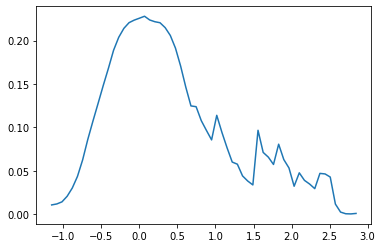

In [154]:
plt.plot(test_md[['pos_idx1','pred_any']].groupby('pos_idx1').mean())

In [89]:
predictions = np.exp(np.log(preds).mean((0,1)))

In [43]:
predictions = 1 / (1 + np.exp(-(np.log(preds/(1-preds)).mean((0,1)))))

In [7]:
predictions = preds.mean((0,1))

In [164]:
predictions.mean(0)

array([0.13210819, 0.00500865, 0.04296379, 0.03041563, 0.04685452,
       0.05570805])

In [57]:
predictions.mean(0)

array([0.1280228 , 0.00678272, 0.04317398, 0.03195811, 0.04593468,
       0.05528003], dtype=float32)

In [165]:
id_column = np.array([a + '_' + b for a in test_md.SOPInstanceUID for b in all_ich])
sub = pd.DataFrame({'ID': id_column, 'Label': predictions.reshape(-1)})

In [166]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.13210818987178466

In [58]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.1281835436820984

In [157]:
best_sub = pd.read_csv(PATH/'submission_061.csv')

In [158]:
best_sub.loc[range(0,len(sub),6), 'Label'].mean()

0.13475628267250392

In [167]:
sub.to_csv(PATH/'sub.csv', index=False)

In [168]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.993965921739907

In [63]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.9944464662920349

In [121]:
!~/.local/bin/kaggle competitions submit rsna-intracranial-hemorrhage-detection -f ~/sub.csv -m "GCP, d161+d169+d201+s101+yd161, 8TTA, 3folds, ensemble, - sanity check"

'~' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!kaggle competitions submit rsna-intracranial-hemorrhage-detection -f C:/StudioProjects/Hemorrhage/sub.csv -m "GCP, d161+d169+d201+s101+yd161, 8TTA, ensemble, bounds"